# Preprocessing Amazon data

## Import library

In [788]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import re

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [789]:
# with open("../../dataset/Amazon/amazon_product_infos.csv", encoding='utf-8') as f:
#     with open('../../dataset/Amazon/amazon_product_infos_pre.csv', 'w', encoding='utf-8') as g:
#         line = f.readline()
#         print(line)
#         count = 0
#         while line != '':
#             line = line[1:-1]
#             datas = line.split('\t')
#             datas[len(datas)-1] = datas[len(datas)-1][:datas[len(datas)-1].find('",,,')]
#             item = '\t'.join(datas) + '\n'
#             g.write(item)
#             line = f.readline()

## Read data

In [790]:
df = pd.read_csv("../../dataset/Amazon/amazon_product_infos_pre.csv", encoding='utf-8', sep='\t', index_col=False )
df.head()

,Price,Screen Size,Max Screen Resolution,Processor,RAM,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Wireless Type,...,Rear Webcam Resolution,Power Source,Voltage,Memory Speed,California residents,Graphics Card Ram Size,National Stock Number,Package Dimensions,Audio-out Ports (#),Battery Type
0,$309.99,15.6 inches,1920 x 1080,3.5 GHz Ryzen 3 2200U,4 GB DDR4,128 GB Flash Memory Solid State,AMD Radeon Vega 3,AMD,Integrated,802.11ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$162.92,10.1 inches,1920x1200 pixels,1.8 GHz 8032,2 GB,32 GB,Mali-G71 MP2,NaN,Integrated,"802.11a/b/g/n/ac"", 2.4 GHz Radio Frequency,"" 5...",...,8 MP,Battery,5 volts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$246.99,11.6 inches,1366X768 pixels,2.1 GHz MediaTek_MT8127,4 GB LPDDR3,64 GB Flash Memory Solid State,PowerVR SGX543,Intel,Integrated,"802.11a"", 802.11b,"" 802.11g",...,NaN,NaN,NaN,1600 MHz,Click here for Proposition 65 warning,NaN,NaN,NaN,NaN,NaN
3,"1 ,""089.00",15.6 inches,1920 x 1080,4.5 GHz Intel Core i7,16 GB DDR4,256 GB Flash Memory Solid State,NaN,NVIDIA,Dedicated,802.11ac,...,NaN,NaN,NaN,NaN,NaN,6 GB,NaN,NaN,NaN,NaN
4,$127.97,11.6 inches,1366 x 768 pixels,2.1 GHz MediaTek MT8125,4 GB DDR4,Flash Memory Solid State,PowerVR GX6250,Chromebook,Mediatek,Bluetooth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [851]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nRows and Columns:")
    print(df.shape)
    print("\nColumn names:")
    print(df.columns)
    print("\nPercent Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)*100))
    print("\nUnique values:")
    print(df.nunique())
    print("Describe: ")
    print(df.describe())

quick_analysis(df)

Data Types:
Price                              float64
Screen Size                        float64
Processor                           object
RAM                                  int64
Hard Drive                          object
Graphics Coprocessor                object
Chipset Brand                       object
Card Description                    object
Wireless Type                       object
Number of USB 2.0 Ports            float64
Number of USB 3.0 Ports            float64
Brand Name                          object
Series                              object
Item model number                   object
Operating System                    object
Item Weight                         object
Product Dimensions                  object
Item Dimensions L x W x H           object
Color                               object
Processor Brand                     object
Processor Count                    float64
Computer Memory Type                object
Flash Memory Size                   object

## Preprocessing data

From information above, there are serveral task to handle:
- Drop all row has *price* is NA and get value of *price* (as type float)
- Merge *Max Screen Resolution* and *Screen Resolution*
- Drop columns has many NA value (larger than 30% NA value)
- Handle value each columns (ex: 16.5 inches will convert to 16.5) for prediction
- Splite each field to columns (such as *Item Dimensions L x W x H*)

#### __Price__
*Price* is first considered because it is result of model

Drop NaN value in __Price__

In [792]:
df.dropna(subset=['Price'], how='all', inplace=True)

Get exactly value of *Price* column

In [793]:
def handle_price(s):
    s = str(s)
    for ch in ['$', '"', '\'', ',', ' ']:
        s = s.replace(ch, '')
    return s

In [794]:
df['Price'] = df['Price'].map(handle_price)
df['Price'] = df['Price'].astype(float)

#### __Screen Resolution__

Merge two columns: *Max Screen Resolution* and *Screen Resolutiono*. Since, two columns are same and just keep one columns for prediction.

The *Screen Resolution* will be keeped.

In [795]:
df[['Max Screen Resolution', 'Screen Resolution']].isna().sum()

Max Screen Resolution    1850
Screen Resolution        3573
dtype: int64

In [796]:
df['Screen Resolution'] = df['Screen Resolution'].fillna(df['Max Screen Resolution'])
df.drop(columns=['Max Screen Resolution'], axis=1, inplace=True)

In [797]:
df['Screen Resolution'].describe()

count            4170
unique            266
top       1920 x 1080
freq              733
Name: Screen Resolution, dtype: object

Handle NA, Get value of *Screeen Resolution*

In [798]:
df['Screen Resolution'] = df['Screen Resolution'].fillna("1920 x 1080")

In [799]:
def check_screen_resolution(x):
    xs = re.findall(r'\d+', x)
    if len(xs)!=2:
        print(x)

In [800]:
df['Screen Resolution'].map(check_screen_resolution)

3840*2160@30Hz
1 pixels
na
17 Inch WQXGA (2560 x 1600)
Information Not Avalble pixels
4096×2160@30Hz
3000 x 2000 pixel (267ppi)
0.001x0.001
1 pixels
1900 pixels
pixels
1 pixels
1280x800"," Max 2560x1600
2560x1600 1280x800
N/A pixels
1 pixels
1
1024 pixels
4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen
HD
1536 pixels
4K
4K
1",920 x 1,"080 pixels
Full-HD
1",920 x 1,"200 pixels
2736 x 1824"," 267 PPI pixels
1","280 x 800 pixels
13.66x768 pixels
1
1
1 pixels
1 pixels
3000 x 2000 (267 PPI) pixels
1 pixels
564 PPI
1 pixels
3840 x 2160 4K IPS Touchscreen
1
2736 x 1824 (267 PPI)
8.0"" Full HD IPS Display (1920x1200)
4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen
1536 pixels
1
4K Ultra HD ( 3840 x 2160 )
1 pixels
1
1","280 x 800 pixels
720P
1 pixels
1 pixels
1 pixels
214 pixels
1
1
1536 pixels
1
1280 pixels
1 pixels
1080p


0       None
1       None
2       None
3       None
4       None
        ... 
5759    None
5760    None
5761    None
5762    None
5763    None
Name: Screen Resolution, Length: 5675, dtype: object

In [801]:
df['Screen Resolution'] = df['Screen Resolution'].replace(['1 pixels','1','N/A pixels', 'Information Not Avalble pixels',\
                                                          'na', '0.001x0.001', '1900 pixels', 'pixels', '1",920 x 1,"080 pixels',\
                                                           'Full-HD', '1080p','214 pixels'] \
                                                          ,'1920 x 1080')
df['Screen Resolution'] = df['Screen Resolution'].replace("1024 pixels", "1024x576")
df['Screen Resolution'] = df['Screen Resolution'].replace(["HD", "720P", "1280 pixels"], "1280 x 720")
df['Screen Resolution'] = df['Screen Resolution'].replace("1536 pixels", "2048 × 1536")
df['Screen Resolution'] = df['Screen Resolution'].replace("564 PPI", "2560 x 1440")
df['Screen Resolution'] = df['Screen Resolution'].replace(['2736 x 1824 (267 PPI)', '3000 x 2000 pixel (267ppi)', '2736 x 1824"," 267 PPI pixels'\
                                                          ,'2736 x 1824"," 267 PPI pixels', '3000 x 2000 (267 PPI) pixels'], "2736 x 1824")
df['Screen Resolution'] = df['Screen Resolution'].replace(['4K', '4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen', \
                                                           '3840 x 2160 4K IPS Touchscreen', '3840*2160@30Hz', \
                                                          '4K Ultra HD ( 3840 x 2160 )', '4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen',\
                                                           '4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen','4K@60Hz',
                                                          '4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen'], '3840 x 2160')
df['Screen Resolution'] = df['Screen Resolution'].replace(['8.0"" Full HD IPS Display (1920x1200)', '1",920 x 1,"200 pixels'], "1920 x 1200")
df['Screen Resolution'] = df['Screen Resolution'].replace(['17 Inch WQXGA (2560 x 1600)', '2560x1600 1280x800'], '2560 x 1600')
df['Screen Resolution'] = df['Screen Resolution'].replace('4096×2160@30Hz', '4096×2160')
df['Screen Resolution'] = df['Screen Resolution'].replace(['1280x800"," Max 2560x1600', '1","280 x 800 pixels'], '1280 x 800')
df['Screen Resolution'] = df['Screen Resolution'].replace('13.66x768 pixels', '1366 x 768')

In [802]:
def get_screen_resolution(x):
    xs = re.findall(r'\d+', x)
    xs = [int(x) for x in xs]
    xs.sort(reverse = True)
    return str(xs[0]) + ' '+ str(xs[1])

In [803]:
df[df['Screen Resolution'].str.contains("4K")]['Screen Resolution']

4032    4K Ultra HD ( 3840 x 2160 ) IPS Touchscreen
Name: Screen Resolution, dtype: object

In [804]:
df['Screen Resolution'] = df['Screen Resolution'].map(get_screen_resolution)

In [805]:
df['Screen Resolution Width'], df['Screen Resolution Height'] = df['Screen Resolution'].str.split(' ', 1).str
df.drop(columns=['Screen Resolution'], axis=1, inplace=True)

In [806]:
df['Screen Resolution Width'] = df['Screen Resolution Width'].astype(int)
df['Screen Resolution Height'] = df['Screen Resolution Height'].astype(int)

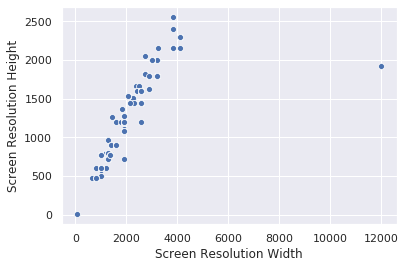

In [807]:
sns.scatterplot(x="Screen Resolution Width", y="Screen Resolution Height", data=df)

From chart about, it should be remove outline (avoid noise)

In [808]:
df.drop(df['Screen Resolution Width'].idxmax(), inplace=True)
df.drop(df['Screen Resolution Width'].idxmin(), inplace=True)

In [809]:
df[['Screen Resolution Width', 'Screen Resolution Height']].describe()

,Screen Resolution Width,Screen Resolution Height
count,5673.000000,5673.000000
mean,1816.966508,1038.381103
std,469.960487,278.581371
min,640.000000,480.000000
25%,1366.000000,768.000000
50%,1920.000000,1080.000000
75%,1920.000000,1080.000000
max,4096.000000,2560.000000


#### __Screen Size__

Just get value and convert type

> - Column Name: Screen Size
- Type: float

In [810]:
df['Screen Size'] = df['Screen Size'].astype('str')

In [811]:
df['Screen Size'].describe()

count            5673
unique             93
top       15.6 inches
freq             2039
Name: Screen Size, dtype: object

*Screen Size* will fill NA by most appear in df

In [812]:
value = "15.6 inches"

In [813]:
# Will updated
df['Screen Size'] = df['Screen Size'].fillna(value)
df['Screen Size'] = df['Screen Size'].replace(['nan','1 centimeters','1', '1 inches', '0.1 inches', '0.1 centimeters', '0.01 inches', \
                                                '0.01 centimeters', '1080', '156 inches'], value)
df['Screen Size'] = df['Screen Size'].replace(['100 inches'], '10.1 inches')
df['Screen Size'] = df['Screen Size'].replace(['114 inches'], '11.4 inches')

In [814]:
# Just for test
df[df['Screen Size'].str.contains('1 ')]['Screen Size'].unique()

array(['10.1 inches', '11 inches', '14.1 inches', '7.1 inches',
       '21 inches', '10.1 Feet', '16.1 inches'], dtype=object)

In [815]:
def get_screen_size(x):
    arr = x.split()
    if len(arr) > 0:
        return arr[0]
    return x

In [816]:
df['Screen Size'].map(get_screen_size).unique()

array(['15.6', '10.1', '11.6', '14', '12.3', '9.7', '10.5', '0.01', '7',
       '12.9', '23.8', '11', '13.3', '17.3', '10', '8', '7.9', '13.5',
       '15', '14.1', '12.2', '9.6', '17', '20', '13', '12.5', '10.8',
       '13.9', '11.5', '3', '28', '27', '0.1', '15.4', '12', '5', '8.4',
       '6', '11.4', '20.32', '100', '9', '8.9', '19.5', '24', '21.5',
       '17.25', '7.1', '10.2', '21', '10.6', '14.7', '7.85', '2.5',
       '33.78', '4.3', '12.4', '23', '14.4', '8.3', '18.4', '16', '22',
       '39.624', '2.7', '32', '15.5', '6.9', '19', '16.1', '11.2', '32.8',
       '18.5', '3.8'], dtype=object)

In this result abouve, some value need to replace.

Code will updated in cell above.

Value need to replaced: 
- ['1', '0.1', '0.01', '1080', '156']: 15.6
- 100: 10.1
- 114: 11.4

In [817]:
# Apply
df['Screen Size'] = df['Screen Size'].map(get_screen_size)

In [818]:
df['Screen Size'] = df['Screen Size'].astype(float)

Remove outline value

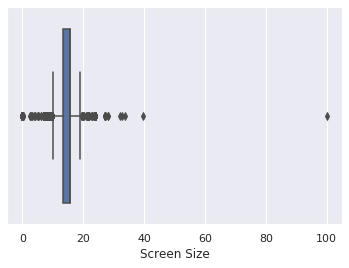

In [819]:
sns.boxplot(x=df['Screen Size'])

In [820]:
df['Screen Size'].isna().sum()

0

In [821]:
df['Screen Size'].describe()

count    5673.000000
mean       14.139474
std         3.366125
min         0.010000
25%        13.300000
50%        15.600000
75%        15.600000
max       100.000000
Name: Screen Size, dtype: float64

In [822]:
df = df[(df['Screen Size'] >= 7) & (df['Screen Size'] <= 64)]

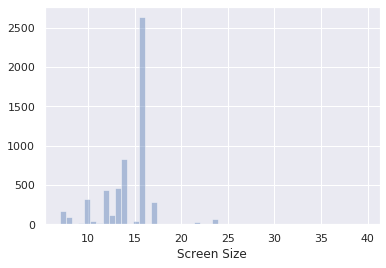

In [823]:
sns.distplot(df['Screen Size'], kde=False);

#### __Processor__

In [824]:
df['Processor'].nunique()

978

#### __RAM__
Get RAM. ex: 8GB convert to 8

> - Column Name: RAM
-Type: int


In [825]:
df['RAM'].describe()

count     5496
unique     317
top       8 GB
freq       682
Name: RAM, dtype: object

In [826]:
df['RAM'] = df['RAM'].fillna("8 GB")

In [827]:
df['RAM'].sample(10)

2292           8 GB DDR3
3646           1 GB DDR2
1059                8 GB
3403    16 GB ddr4_sdram
3516                8 GB
4702           16 GB DDR
4698                4 GB
2896           8 GB DDR4
4350           8 GB DDR4
901           16 GB DDR4
Name: RAM, dtype: object

In [828]:
RAM_FILL = 8

In [829]:
def get_ram(x):
    x = x.upper()
    xs = re.findall('\d+ GB|\d+ DDR4', x)
    
    if len(xs)>0:
        return xs[0].split()[0]
    return RAM_FILL

In [830]:
df['RAM'] = df['RAM'].map(get_ram)


In [831]:
df['RAM'] = df['RAM'].astype(int)

In [841]:
df['RAM'].describe()

count    5596.000000
mean       10.498392
std        21.604194
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max       512.000000
Name: RAM, dtype: float64

#### __Hard Drive__

#### __Brand Name__

#### __Series__

#### __Operating System__

#### __Item Weight__

#### __Processor Brand__

#### __Processor Count__

#### __Card Description__

#### __Wireless Type__

#### __Item model number__

#### __Product Dimensions__

#### __Item Dimensions L x W x H__

#### __Batteries__

#### __Hardware Platform__

#### __Hard Drive Interface__

#### __Computer Memory Type__

### Drop column has many NaN value

In [859]:
df.isna().sum()

Price                                 0
Screen Size                           0
Processor                           217
RAM                                   0
Hard Drive                          127
Graphics Coprocessor                824
Chipset Brand                      1745
Card Description                   1399
Wireless Type                      1380
Number of USB 2.0 Ports            3969
Number of USB 3.0 Ports            4381
Brand Name                           22
Series                              396
Item model number                  1163
Operating System                    556
Item Weight                           1
Product Dimensions                  882
Item Dimensions L x W x H           882
Color                              2638
Processor Brand                     712
Processor Count                     118
Computer Memory Type               1484
Flash Memory Size                  1692
Hard Drive Interface               1406
Hard Drive Rotational Speed        3690


In [7]:
df.isna().sum().describe()

count      41.000000
mean     2412.000000
std      1999.674849
min         1.000000
25%       736.000000
50%      1563.000000
75%      4156.000000
max      5752.000000
dtype: float64

In [8]:
# Drop > 75% NaN values of columns
MAX_NAN_COUNT = 4156

In [9]:
drop_cols_name = [col for col in df.columns if df[col].isna().sum() > MAX_NAN_COUNT]
drop_cols_name
# for i in drop_cols_name:
#     print(df[i].isna().sum())

['Number of USB 3.0 Ports',
 'Rear Webcam Resolution',
 'Voltage',
 'Memory Speed',
 'California residents',
 'Graphics Card Ram Size',
 'National Stock Number',
 'Package Dimensions',
 'Audio-out Ports (#)',
 'Battery Type']

In [10]:
df.drop(columns=drop_cols_name, axis=1, inplace=True)

### 3. Get price

In [12]:
def handle_price(s):
    s = str(s)
    for ch in ['$', '"', '\'', ',', ' ']:
        s = s.replace(ch, '')
    return s

In [13]:
float(handle_price('1,"343,324.2'))

1343324.2

In [14]:
df['Price'] = df['Price'].map(handle_price)
df['Price'] = df['Price'].astype(float)

### 4. Handle NaN value

List all column has NaN value

In [122]:
df.isna().any()

Price                              False
Screen Size                         True
Processor                           True
RAM                                 True
Hard Drive                          True
Graphics Coprocessor                True
Chipset Brand                       True
Card Description                    True
Wireless Type                       True
Number of USB 2.0 Ports             True
Number of USB 3.0 Ports             True
Brand Name                          True
Series                              True
Item model number                   True
Operating System                    True
Item Weight                         True
Product Dimensions                  True
Item Dimensions L x W x H           True
Color                               True
Processor Brand                     True
Processor Count                     True
Computer Memory Type                True
Flash Memory Size                   True
Hard Drive Interface                True
Hard Drive Rotat

In [49]:
# Fill na 
df = df.replace('', np.nan)

#### 4.1 Drop NaN value in __Price__

In [15]:
df.dropna(subset=['Price'], how='all', inplace=True)

#### 4.2 __Screeen Resolution__

Merge two columns: *Max Screen Resolution* and *Screen Resolutiono*. Since, two columns are same and just keep one columns for prediction.

The *Screen Resolution* will be keeped.

In [28]:
df[['Max Screen Resolution', 'Screen Resolution']].isna().sum()

Max Screen Resolution    1850
Screen Resolution        3573
dtype: int64

In [51]:
df[df['Max Screen Resolution'].notna() & df['Screen Resolution'].isna()][['Max Screen Resolution', 'Screen Resolution']]

,Max Screen Resolution,Screen Resolution
0,1920 x 1080,NaN
3,1920 x 1080,NaN
6,1920 x 1080 pixels,NaN
9,1920 x 1080,NaN
10,1920 x 1080,NaN
...,...,...
5751,800x1280 pixels,NaN
5753,1366 x 768,NaN
5755,1366 x 768,NaN
5756,1024 x 600,NaN


Fill NA value of *Screen resolution* by value of *Max Screen resolution*

In [63]:
df['Screen Resolution'] = df['Screen Resolution'].fillna(df['Max Screen Resolution'])

In [65]:
df.drop(columns=['Max Screen Resolution'], axis=1, inplace=True)

In [61]:
df['Screen Resolution'].isna().sum()

1505

In [76]:
# Percent NA value of Screen resolution
df['Screen Resolution'].isna().sum() / len(df['Screen Resolution'])*100

26.519823788546255

#### Screen Size

In [80]:
df['Screen Size'].describe()

count            5256
unique             92
top       15.6 inches
freq             2039
Name: Screen Size, dtype: object

In [ ]:
df[

### 5. #

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5675 entries, 0 to 5763
Data columns (total 30 columns):
Price                              5675 non-null float64
Screen Size                        5256 non-null object
Processor                          5449 non-null object
RAM                                5571 non-null object
Hard Drive                         5543 non-null object
Graphics Coprocessor               4835 non-null object
Chipset Brand                      3871 non-null object
Card Description                   4264 non-null object
Wireless Type                      4232 non-null object
Number of USB 2.0 Ports            1675 non-null float64
Brand Name                         5653 non-null object
Series                             5266 non-null object
Item model number                  4503 non-null object
Operating System                   5103 non-null object
Item Weight                        5674 non-null object
Product Dimensions                 4788 non-null ob

# Save file

In [ ]:
df.to_csv("../amazon.csv",index=0)

# Other

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5675 entries, 0 to 5763
Data columns (total 31 columns):
Price                              5675 non-null float64
Screen Size                        5256 non-null object
Max Screen Resolution              3825 non-null object
Processor                          5449 non-null object
RAM                                5571 non-null object
Hard Drive                         5543 non-null object
Graphics Coprocessor               4835 non-null object
Chipset Brand                      3871 non-null object
Card Description                   4264 non-null object
Wireless Type                      4232 non-null object
Number of USB 2.0 Ports            1675 non-null float64
Brand Name                         5653 non-null object
Series                             5266 non-null object
Item model number                  4503 non-null object
Operating System                   5103 non-null object
Item Weight                        5674 non-null ob

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[0]

#### EDA

In [ ]:
#Visual Exploratory Data Analysis (EDA) And Your First Model
#EDA on Feature Variables
print(list(set(df.dtypes.tolist())))
df_object = df.select_dtypes(include=["object"]).copy()
df_int = df.select_dtypes(include=['int64']).copy()

categorical = df_object.columns
numerical = df_int.columns

print("Datashape of Object Dataframe:",df_object.shape)
print("Datashape of Interger Dataframe:",df_int.shape)

In [ ]:
# Univariate Analysis
# EDA with Categorical Variables

fig,ax = plt.subplots(5,2, figsize=(20,20))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

In [ ]:
# EDA with Numerical Variables
# df[numerical].hist(bins=50,figsize=(16,20),layout=(8,3))